## Machine Learning

Datasets

Train and Test Data are pulled from the same sample of data
Train Data is to train the Model
Test Data is to validate the training accuracy of the Model
Future Data is to predict the data on the Model

Features Representation
y - Target Values
X - data(row) - instances/Sample/Populations
f:X->y


Python Packages
Scikit-learn
SciPy

Types of ML:
    
a) Supervised Machine Learning - Labelled Data
    i) Classification - target values discrete Labelled Data
        1) Binary Data - two feature representation
        2) Multi-class - belonging to a specific class in the set of class
        3) Multi-label - belongs to a sub-set of class in target values
    ii) Regression - target values Continuous Labelled Data

b) UnSupervised Machine Learning - structures 
    i) Clustering
    ii) Outlier Detection

In [11]:
#Train and Test Spliting for a single Data Source in 75:25 Ratio
#random_state - is used to get the same split for each execution 

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

fruitdatapath = r'C:\Users\Upend\Anaconda3\MyScripts\Fruit_Data.txt'

fruit_data = pd.read_table(fruitdatapath)
X = fruit_data[['height','width','mass','color_score']]
y = fruit_data['fruit_label']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(59, 4)
(59,)
(44, 4)
(15, 4)
(44,)
(15,)


## Supervised 

#Generalization 
- Model which can predict the test data to an accuracy with looking the general behaviour of the data
- training data score values reduce but give a good score value for the test data
#Overfitting 
- Model is too complex and tries to find a model to suit for every data in the training set
 - High score value for training data
 - Low score value for test data 
 - example n_neighbor = 1
#underfitting 
 - Model is too simple and broadly classifies the data 
 - Low Score value for both the data
 - example n_neighbor = 10

#Regularization
    -  Process of smoothing the decision boundaries 
    - different models have different parameters to smooth the decision boundaries
        - so as to reduce overfitting 
        - generalize the model well to predict future data
        - alpha/gamma/c - examples

#Normalization 
- process of converting all the feature values to a uniform scale
- calculates the Max and Min values and assigns 1 and 0 
- and all the values between these would be assigned a fraction value between 0 and 1
- increases the prediction accuracy immensly

- same scalar object should be used for train and test data
- only train data should be fit 


In [52]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
X_train_scalar = scalar.fit_transform(X_train)
X_test_scalar = scalar.transform(X_test)

print(X_train_scalar[:3])
print(X_test_scalar[:3])

[[0.89514222]
 [0.32672516]
 [0.28455948]]
[[0.9338594 ]
 [0.44905199]
 [0.61279039]]


#Cross-Validation
- using of Multiple Train and Test splits and calculating the mean 
    - creates folds, each fold contains train and test data from sample (cv is the parameter which controls it)
- as random_state varies the accuracy of the model varies - to minimize the variance
- must apply Normalization should be done for every split
Stratified Cross-Validation
-  to elimate the impact of clusting of a single lable in train or in test.
- it tries to split the data in train and test with all the labels so to increase the model accuracy
Leave-one-out Cross-Validation
- N Samples => cv = N folds

In [69]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_neighbors=5)
cross_val_score(clf,X_C2,y_C2)

NameError: name 'KNeighborsClassifier' is not defined

In [119]:
#R2_Score - is used to check for the accuracy of the Training data
#R2_score(y_train,xyz.predict(X_train))

In [117]:
#Validation Curve
- used to calculate the Train and test score for given theory object by varing few parameters.
- take the actual datasets without any split
#from sklearn.svm import SVC
#from sklearn.model_selection import validation_curve
#gamma = np.logspace(-4,1,6)
#train_score,test_score = validation_curve(SVC(random_state=0),X_subset,y_subset,param_name='gamma',param_range=gamma,scoring = 'accuracy')

## Datasets

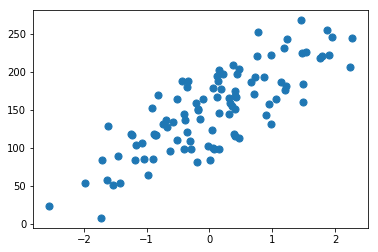

In [3]:
#Creating sample dataset with complexity for learning

#Simple Regression dataset with one variable
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline

X_R1,y_R1 = make_regression(n_samples=100,n_features=1,n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)

plt.figure()
plt.scatter(X_R1,y_R1,marker = 'o', s = 50)

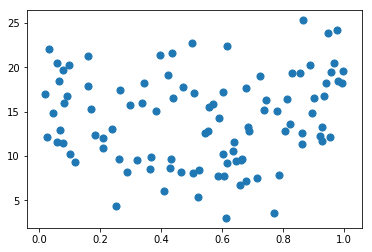

In [26]:
#complex Regression with one variable

from sklearn.datasets import make_friedman1

X_F1,y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)
#print(X_F1.shape)
plt.scatter(X_F1[:,2],y_F1,marker='o',s=50)


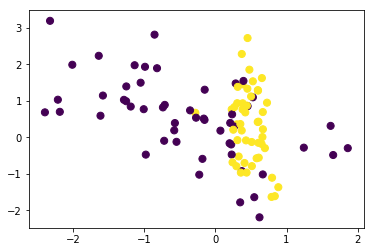

In [76]:
# Simple Binary Classification
from sklearn.datasets import make_classification
    
X_C2,y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
#print(y_C2.shape)
plt.scatter(X_C2[:,0],X_C2[:,1],c=y_C2,marker='o',s=50)

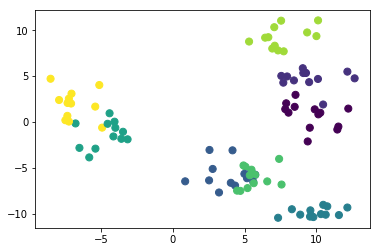

In [4]:
# Complex Binary Classification

from sklearn.datasets import make_blobs

X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)

plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50)
#plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
#           marker= 'o', s=50, cmap=cmap_bold)

In [74]:
# Communities and Crime dataset for regression
# https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

crimedatapath = r'C:\Users\Upend\Anaconda3\MyScripts\CommViolPredUnnormalizedData.txt'

crime = pd.read_table(crimedatapath, sep=',', na_values='?')
# remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
crime = crime.iloc[:,columns_to_keep].dropna()

X_crime = crime.iloc[:,range(0,88)]
y_crime = crime['ViolentCrimesPerPop']

#print(X_crime[:5])
print(y_crime[:5])

0     41.02
1    127.56
2    218.59
3    306.64
5    442.95
Name: ViolentCrimesPerPop, dtype: float64


## KNeighbors Theory 

#KNeighbors Theory 
  - predicts the data with respect the majority of the nearest neighbors
  - n_neightbors - we can define the neighbors count - Model complexity
  - No Learning Happens - Testing takes more time and computation
 - considers the distance from the two values 
  - memorizes all the training data and predicts based on it - Lazy Learner
  - can be used for both classifer and regression models
  - R^2 - Coefficient of Determination - 1 - accurate prediction
  
fit - to train a model with train data

score - to check for model accuracy with the test data(0 -> 1)

predict - to predict the future data by taking the features and giving the target value - label

In [13]:
#KNN for Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
print("Accuracy Score: ", knn.score(X_test,y_test))

example_fruit = [[5.5,2.5,10,7.0]]
print("Predicted Fruit: ", knn.predict(example_fruit))

Accuracy Score:  0.5333333333333333
Predicted Fruit:  [2]


In [47]:
#KNN for Regression
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 7)
X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state = 0)
knn.fit(X_train,y_train)
print('Train data accuracy', knn.score(X_train,y_train))
print('Test Data accuracy', knn.score(X_test,y_test))


Train data accuracy 0.7196051049133447
Test Data accuracy 0.47050230364695134


## Liner Model

Liner Regression
- Sum of the weighted variables

Liner equation y = wx + b
y - Target value
w - feature weight - Model coefficient
x - input variables
b - bias term/intercept

w and b are interpreted to minimize the sum of square difference of actual value vs the expected value - Least Square
No parameter to control the complexity


#Least Square Regression
 - RSS = sum(y-(wx+b))^2 - Trying to minimize the value of this

In [43]:
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test = train_test_split(X_R1,y_R1,random_state = 0)

linreg = LinearRegression().fit(X_train,y_train)

print('linear coeff',linreg.coef_)
print('linear intercept',linreg.intercept_)
print('Train data accuracy', linreg.score(X_train,y_train))
print('Test Data accuracy', linreg.score(X_test,y_test))

linear coeff [45.70870465]
linear intercept 148.44575345658873
Train data accuracy 0.6785950771141656
Test Data accuracy 0.49159615934930306


NameError: name 'linreg' is not defined

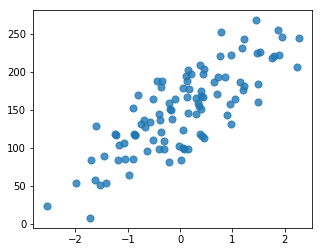

In [19]:
#plotting the linear equation
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')

#Ridge Regression
 - L2 Regularization
 - Regularization is the penality which is added to the linear regression to reduce overfitting and reduce the complexity of the model
 - Alpha - controls Model Complexity  
         - Higher value for more regularized and simple models 
         - there is a optimal value of alpha for which the train and test scores are high and drop after that for increase in the value of Alpha
    RSS(w,b) = sum(y-(wx+b))^2 + alpha * sum(w)^2 
- Variables are low to medium effect
 - Alpha is more than Lasso regression
    

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

X_train,X_test,y_train,y_test = train_test_split(X_crime, y_crime,random_state=0)
rid = Ridge(alpha=15).fit(X_train,y_train)
print("Train Score", rid.score(X_train,y_train))
print("Test Score", rid.score(X_test,y_test))

print("After Normalization\n")
scalar = MinMaxScaler()

X_train_scalar = scalar.fit_transform(X_train)
X_test_scalar = scalar.transform(X_test)

ridscalar = Ridge(alpha=20).fit(X_train_scalar,y_train)

print("Train Score", ridscalar.score(X_train_scalar,y_train))
print("Test Score", ridscalar.score(X_test_scalar,y_test))

Train Score 0.6711418726469425
Test Score 0.49435144173711804
After Normalization

Train Score 0.6146175955616784
Test Score 0.5986066019999294


#Lasso Regression
 - L1 Regularization - reduces the sum of the absolute values of coefficients
 - Regularization is the penality which is added to the linear regression to reduce overfitting and reduce the complexity of the model
 - Alpha - controls Model Complexity  - Higher value for more regularized and simple models
    RSS(w,b) = sum(y-(wx+b))^2 + alpha * sum(|w|) 
- sets 0 to the features which have less impact variables - Sparse solution
 - Variables are medium to large effect
 - Alpha less than Ridge regression

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso

X_train,X_test,y_train,y_test = train_test_split(X_crime, y_crime,random_state=0)
las = Lasso(alpha=15).fit(X_train,y_train)
print("Train Score", las.score(X_train,y_train))
print("Test Score", las.score(X_test,y_test))
print('lasso regression linear model coeff:\n{}'
     .format(las.coef_))

print("After Normalization\n")
scalar = MinMaxScaler()

X_train_scalar = scalar.fit_transform(X_train)
X_test_scalar = scalar.transform(X_test)

lasscalar = Lasso(alpha=20).fit(X_train_scalar,y_train)
print('lasso regression linear model coeff:\n{}'
     .format(lasscalar.coef_))

print("Train Score", lasscalar.score(X_train_scalar,y_train))
print("Test Score", lasscalar.score(X_test_scalar,y_test))

Train Score 0.6594003880221504
Test Score 0.46783889857310246
lasso regression linear model coeff:
[ 1.01656357e-03  0.00000000e+00  0.00000000e+00 -1.20440393e+01
  0.00000000e+00 -0.00000000e+00 -1.88695648e-03  1.31686027e+00
 -3.42011698e-04 -7.86686238e-01  0.00000000e+00 -4.35501099e+00
  8.99051679e-01 -0.00000000e+00 -4.71824911e+00  3.09906674e-03
 -1.05138164e-03  3.22831759e-03 -0.00000000e+00 -1.07442436e+01
  4.68064319e+00 -0.00000000e+00 -0.00000000e+00  4.16173554e+00
 -2.23579190e+00 -9.93134172e-01  0.00000000e+00  1.50932696e-01
  0.00000000e+00  4.70296523e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.03500844e+01  0.00000000e+00
  0.00000000e+00  9.39158053e-01 -6.84696621e+00 -7.60527809e-04
  4.41097086e+01 -1.25456811e-03  0.00000000e+00 -2.18828212e-01
 -5.79819466e-01  1.76825128e-01 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.85763190e-01 -2.00370949e+01
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.0000

C:\Users\Upend\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


#Polynomial Regression
x = (x0,x1)  -> generates new features (x0,x1,x1^2,x2^2,x1x2)
y = w1x0 + w2x1 + w3x0^2 + w4x1^2 + w5x1x2
- captures interactions betweens the features by combining them.
- high chance of Overfitting
- controls complexity by degree parameter
- generally combined with other regression models


In [87]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

X_train,X_test,y_train,y_test = train_test_split(X_F1, y_F1,random_state=0)
rid = Ridge(alpha=20).fit(X_train,y_train)
print("Train Score", rid.score(X_train,y_train))
print("Test Score", rid.score(X_test,y_test))

print("\nAfter Normalization\n")
scalar = MinMaxScaler()

X_train_scalar = scalar.fit_transform(X_train)
X_test_scalar = scalar.transform(X_test)

ridscalar = Ridge(alpha=20).fit(X_train_scalar,y_train)

print("Train Score", ridscalar.score(X_train_scalar,y_train))
print("Test Score", ridscalar.score(X_test_scalar,y_test))

print("\nAfter polynomial regression\n")

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_train_poly, y_F1,
                                                   random_state = 0)
ridpoly = Ridge().fit(X_train,y_train)

print("Train Score", ridpoly.score(X_train,y_train))
print("Test Score", ridpoly.score(X_test,y_test))

Train Score 0.34302066212052595
Test Score 0.31084022494017227

After Normalization

Train Score 0.35027955138533595
Test Score 0.3187797098345736

After polynomial regression

Train Score 0.8257620613919463
Test Score 0.8251115209759516


## Logistic Regression

 - The logistic function transforms real-valued input to an output number y between 0 and 1
 - it is the logistic function of a linear model
 - Parameter C controls the amount of regularization (default = 1)
 - Need to normalize the data 
 - gives a binomial result i.e. positive set and Negative set
 - penality Parameter - (penality = 'L1' or penality = 'L2)
 

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_C2,y_C2,random_state=0)
clf = LogisticRegression(C=10).fit(X_train,y_train)

print("Train Score", clf.score(X_train,y_train))
print("Test Score", clf.score(X_test,y_test))

Train Score 0.8133333333333334
Test Score 0.84


## Support Vector Machines

#liner Classification
x -> f -> y
f(x,w,b) = sign(w.x + b) - dot product of w and x
A linear classifier is a function that maps an input data point x to an output class value y (+1 or -1) using a linear function (with
weight parameters w of the input point's features.
 - Seperates into two class - Positive class and Negative Class
 - Classifier Margin - the max width of the Decision boundaries before hitting a data point
#Linear Support Vector Machine(LSVM)
- line classifier with max margin
C - Controls the model complexity and Regularization - default - 1
Large C - More Regularization - underfitting - simple model
Small C - Less Regularization - Overfitting - complex model
Alpha - L1 and L2 Regularization - default - 1
                                                                                                                                 

In [93]:
#Support Vector Machines - Classifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_C2,y_C2,random_state=0)

svc = SVC(kernel ='linear',C=1).fit(X_train,y_train)

print("Train Score", svc.score(X_train,y_train))
print("Test Score", svc.score(X_test,y_test))

Train Score 0.8
Test Score 0.76


In [95]:
#Lineat Support Vector Machine - Classifier
from sklearn.svm import LinearSVC

svclinear = LinearSVC(C=1).fit(X_train,y_train)
print("Train Score", svclinear.score(X_train,y_train))
print("Test Score", svclinear.score(X_test,y_test))

Train Score 0.8133333333333334
Test Score 0.84


## Kernelized Support Vector Machines

#Kernelized Support Vector Machine classifier
- More complex problems where a linear classifier cannot predict well
- Raising the dimension to next level to fit a linear line - Feature space
- x input is raised to (x,x^2) for a singe variable
-(x1,x2) => (x1,x2,1-(x1^1 + x2^2))
 - RBF - Radial Basis Function Kernal - which helps in raising the dimension - control Model Complexity - Kernal Parameter(default)
 k(x,x1) = exp(gamma . |x-x1|^2)
- Gamma controls the Model Complexity - as it increases - overfitting
    High Values  - closer data points are considered and points farther to the decision boundary are ignored
    Lower Values - points farther to the decision boundaries also play a key role
 - C value for regularization 
     Higher Value - Over fitting  - to get all points correct
     Medium Value - Larger broader margin for the decision Boundary
     Low Value - smooth curve with distinct clusters
 - Normalization important
- need to vary C and gamma for a optimal solution

In [105]:
#KSVM - with RBF default Kernal
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
svc = SVC(gamma = 0.01,c = 10).fit(X_train,y_train)
print("Train Score", svc.score(X_train,y_train))
print("Test Score", svc.score(X_test,y_test))

Train Score 0.8666666666666667
Test Score 0.76


In [106]:
#KSVM - with poly kernal
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
svcpoly = SVC(kernel = 'poly' , degree=3, gamma = 0.01, c=10).fit(X_train,y_train)
print("Train Score", svcpoly.score(X_train,y_train))
print("Test Score", svcpoly.score(X_test,y_test))

Train Score 0.84
Test Score 0.68


## Decision Tree

#Decision Tree
- Each node answers only about one feature
- root node contains the feature which is the major distincvour
- leaf nodes - no child nodes
    - Pure Node : where it contains a unique catergory of data
    - Mixed Nodes: where a mix of data points
- each node contains - Value list - contains the number of data points in each category

- feature importance -  1 - feature predicts the target , 0 - feature not used in prediction  
    - gives idea on the key features used to prediction
- No need to Normalize or split
- generally tend to overfit
- Model Complexity controlled by max_depth, max_leaf_nodes, min_sample_leaf
    - Pre-pruning - controlling the overfitting before building the decision tree by max_depth
    - Post-prunning - building the Decision tree and removing the decision nodes which doesn't have any impact

In [114]:
#decision tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
clf = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)

print("Train Score", clf.score(X_train,y_train))
print("Test Score", clf.score(X_test,y_test))

Train Score 0.9821428571428571
Test Score 0.9736842105263158


In [116]:
#feature importance
for feature, imp in zip(iris.feature_names,clf.feature_importances_):
    print(feature , ' => ', imp)

sepal length (cm)  =>  0.0
sepal width (cm)  =>  0.0
petal length (cm)  =>  0.9440139965008748
petal width (cm)  =>  0.05598600349912522


## Model Evalution and Selection

Evaluation of Binary classification
imbalanced class - majority are negative in a binary classification
Dummy classifier - 
DummyClassifier is a classifier that makes predictions using simple rules, 
which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.
- Ignores input data 
- always products null matric
- not used for classification 
- used for check if a specific classifier is performing well
- takes "Strategy" as a parameter
    - most_frequent,stratified, uniform,constant - Dummy Classifier
    - mean, median, quantile, constant - Dummy Regressor

In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names,np.bincount(y)):
    print(class_name,class_count)

y_binary_imbalance = y.copy()
y_binary_imbalance[y_binary_imbalance!=1] = 0
print(y[1:20])
print(y_binary_imbalance[1:20])
print(np.bincount(y_binary_imbalance))

X_train,X_test,y_train,y_test = train_test_split(X,y_binary_imbalance,random_state=0)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180
[1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[1615  182]


In [17]:
#SVC with default kernal

from sklearn.svm import SVC

svc = SVC(kernel='rbf',C=1).fit(X_train,y_train)
print(svc.score(X_test,y_test))

0.9088888888888889


In [22]:
#Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent').fit(X_train,y_train)
print(dummy.score(X_test,y_test))
print(dummy.predict(X_test))

0.9044444444444445
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [23]:
#SVC with linear kernal

from sklearn.svm import SVC

svc = SVC(kernel='linear',C=1).fit(X_train,y_train)
print(svc.score(X_test,y_test))

0.9777777777777777


## Confusion Matrix - Evaluation method

                 Predict
Actual    Negative   Positive
Negative     TN         FP
Positive     FN         TP

Positive Class
False Positive - Type I error
True Positive 

Negative Class
True Negative 
False Negative - Type II error

TN + TP - Correct Predictions
TN + FP + FN + TP - Total instances

In [41]:
#Evaluating Dummy Classifier with Confusion matrix
# Negative class predicted with 407 True Negatives and 43 False Negatives(errors)
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix

dummy = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
dummy_pred = dummy.predict(X_test)
print(dummy.score(X_test,y_test))
print(confusion_matrix(y_test,dummy.predict(X_test)))

0.9044444444444445
[[407   0]
 [ 43   0]]


In [42]:
#Evaluating Dummy Classifier - stratified

dummy = DummyClassifier(strategy='stratified').fit(X_train,y_train)
dummy_str_pred = dummy.predict(X_test)
print(dummy.score(X_test,y_test))
print(confusion_matrix(y_test,dummy.predict(X_test)))

0.8222222222222222
[[375  32]
 [ 38   5]]


In [43]:
#Evaluating Support Vector Classifer with linear kernal
from sklearn.svm import SVC

svc = SVC(kernel='linear').fit(X_train,y_train)
svc_lin_pred = svc.predict(X_test)
print(svc.score(X_test,y_test))
print(confusion_matrix(y_test,svc.predict(X_test)))

0.9777777777777777
[[402   5]
 [  5  38]]


In [44]:
#Evaluating Support Vector Classifer with radial basis function kernal
from sklearn.svm import SVC

svc = SVC().fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print(svc.score(X_test,y_test))
print(confusion_matrix(y_test,svc.predict(X_test)))

0.9088888888888889
[[407   0]
 [ 41   2]]


In [35]:
#Evaluating Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 2).fit(X_train,y_train)
tree_pred = tree.predict(X_test)
print(tree.score(X_test,y_test))
print(confusion_matrix(y_test,tree_pred))

0.9466666666666667
[[400   7]
 [ 17  26]]


## Evaluation Parameters

Accuracy = (TN + TP)/(TN + FP + FN + TP)
Classification Error = (FP + FN)/(TN +FP + FN + TP) = 1 - Accuracy
Recall/Sensitivity/True Positive Rate/Probability of Detection = TP / (TP + FN)
Precision = TP / (TP + FP)
False Positive Rate = FP / (TN + FP)

Recall and Precision trade off 
- if we are looking for high precision(FP = 0) then there would a reduction in Recall - Precision oriented machine learning(Document Classification)
- if we are looking for high recall(FN = 0) then there would be reduction in Precision - Recall oriented machine learning(Cancer Classification)

F-Measure/F-beta Measure
   - weighted Harmonic mean of Recall and Precision

Generalized Version = (1+beta^2)(TP)/((1+beta^2)(TP) + (beta)(FN) + FP)

beta - controls the emphasis of recall or precision
beta = 0.5 - Precision Oriented
     = 2  - Recall oriented
     = 1 - F1

higher beta - High importance to Recall
lower beta - High Importance to Precision


F1 Score = 2[(Precision)(Recall)/(Precision + Recall)]
         = 2(TP)/(2(TP) + FN + FP)


In [39]:
#Evaluation Parameters for Tree classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: ", accuracy_score(y_test,tree_pred))
print("Precision: ", precision_score(y_test,tree_pred))
print("Recall: ", recall_score(y_test,tree_pred))
print("f1 score: ", f1_score(y_test,tree_pred))

Accuracy:  0.9466666666666667
Precision:  0.7878787878787878
Recall:  0.6046511627906976
f1 score:  0.6842105263157895


In [40]:
#Evaluation parameters in a report

from sklearn.metrics import classification_report
print(classification_report(y_test,tree_pred))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



In [47]:
#Evaluation parameters for all models
print("Classfication_report Tree \n", classification_report(y_test,tree_pred))
print("Classfication_report dummy \n", classification_report(y_test,dummy_pred))
print("Classfication_report dummy stratified model \n", classification_report(y_test,dummy_str_pred))
print("Classfication_report svc \n", classification_report(y_test,svc_pred))
print("Classfication_report svc linear model \n", classification_report(y_test,svc_lin_pred))

Classfication_report Tree 
              precision    recall  f1-score   support

          0       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450

Classfication_report dummy 
              precision    recall  f1-score   support

          0       0.90      1.00      0.95       407
          1       0.00      0.00      0.00        43

avg / total       0.82      0.90      0.86       450

Classfication_report dummy stratified model 
              precision    recall  f1-score   support

          0       0.90      0.88      0.89       407
          1       0.06      0.07      0.06        43

avg / total       0.82      0.81      0.81       450

Classfication_report svc 
              precision    recall  f1-score   support

          0       0.91      1.00      0.95       407
          1       1.00      0.05      0.09        43

avg / total       0.92      0.91      0.87       450

Classficat

C:\Users\Upend\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Uncertainity Estimation

#Decision Function - Certainity of the value as per the model
- How well the function believes that a particular value will fall in a specific class
- Positive values will fall into one category - higher value give higher confidence level
- Negative values will fall into second category

In [52]:
y_score = SVC(kernel = 'linear').fit(X_train,y_train).decision_function(X_test)
print(list(zip(y_test[1:30], y_score[1:30])))

[(0, -11.540750045403932), (0, -13.230104048107385), (0, -21.781715706207045), (0, -22.931391594872046), (0, -12.573945613630052), (1, 4.606778573038106), (0, -19.823130811134227), (0, -22.43962925258679), (0, -25.64359689453604), (0, -17.57621314727023), (0, -12.958510690336446), (0, -24.274004284226997), (0, -8.702543455980866), (0, -6.630907627275654), (0, -6.378607056440181), (1, 9.18827358372696), (0, -23.10558628013532), (0, -15.703164869023134), (0, -16.53454712534451), (0, -19.173260654954014), (0, -17.427448082688237), (0, -17.76586486807755), (0, -9.008978814962823), (0, -26.258422226941228), (0, -17.248703820943796), (0, -17.260289393478637), (0, -29.36172758118598), (0, -21.116695232298888), (0, -20.92057510555869)]


In [58]:
#Predict Proba Function
# apply only for True probabilities

y_score = SVC(kernel='linear',probability=True).fit(X_train,y_train).predict_proba(X_test)
print(list(zip(y_test[0:50],y_score[0:50,1])))

[(0, 1.0000000994736041e-07), (0, 8.276516460373866e-05), (0, 2.184676502158032e-05), (0, 1.0000000994736041e-07), (0, 1.0000000994736041e-07), (0, 3.664930521540819e-05), (1, 0.9655303837350732), (0, 1.2073541392190305e-07), (0, 1.0000000994736041e-07), (0, 1.0000000994736041e-07), (0, 7.099265159704582e-07), (0, 2.7063553900961767e-05), (0, 1.0000000994736041e-07), (0, 0.0007756955881724562), (0, 0.0039720821262269525), (0, 0.004846109978889872), (1, 0.9999972076031838), (0, 1.0000000994736041e-07), (0, 3.1086624393537004e-06), (0, 1.6139707461216027e-06), (0, 2.015394566629415e-07), (0, 7.982755254326033e-07), (0, 6.113272697136288e-07), (0, 0.0006092053399869341), (0, 1.0000000994736041e-07), (0, 9.190889893107638e-07), (0, 9.107317713110358e-07), (0, 1.0000000994736041e-07), (0, 1.0000000994736041e-07), (0, 1.0000000994736041e-07), (0, 2.254539586300824e-06), (0, 1.0000000994736041e-07), (0, 1.8609871500470505e-05), (0, 6.666103060142919e-05), (0, 2.7422358261586883e-05), (0, 1.29

## Precision-Recall Curve

X-axis : Precision
Y-axis : Recall
Ideal Point - Top Right Corner (Precision = 1, Recall = 1)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)


## ROC Curve - AUC (Area Under Curve)

ROC - Receiving Operating Characteristic Curve
X-axis : False Positive Rate
Y-axis : True Positive Rate
Ideal Point - Top Left Corner (False Positive Rate = 0 and True Positive Rate = 1)
Curve is drawn by consider a Threshold value and calculating the False Positive Rate & True Positive Rate at that specific threshold.
Area under the ROC - AUC
AUC = 0 - worest
AUC = 0.5 - bad predicition as positive and negative class predictions are equal
AUC = 1 - best


from sklearn.metrics import roc_curve, auc
y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

## Multi-Class Evaluation

Confusion Matrix
    - 10 Class will have 10 X 10 Matrix 
        X-axis - Predicted Digit
        Y-axis - True Digit
        Values along the diagonal axis from left to right downwards are actual TruePositive and TrueNagative values
        Misclassifications are off the diagonal
    - Heat map generation
Classification Report with average scores by default it is accuracy
Macro Average
    - each class has equal weights
    - Class1_Precision = correct prediction/Total test values of Class1
    Macro Average = Class1_Precision + Class2_Precision + ... Classn_Precision / n
Micro Average
    - each instance has equal weights
    - Large class have more influence
    - Total number of correct predictions/ Total test values
Same number of instances => Micro and Macro Averages are same
If Micro average is less than Macro average => Larger class have poor performance metrics
We can generate Macro and Micro Average scores for all evaluation models like f1_score,precision_score,recall_score

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.91      0.98      0.94        43
          2       0.98      1.00      0.99        44
          3       0.98      0.96      0.97        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       1.00      0.98      0.99        52
          7       1.00      0.98      0.99        48
          8       0.94      0.92      0.93        48
          9       0.96      0.94      0.95        47

avg / total       0.97      0.97      0.97       450

Macro Average 0.9714311576233408
Micro Average 0.9711111111111111


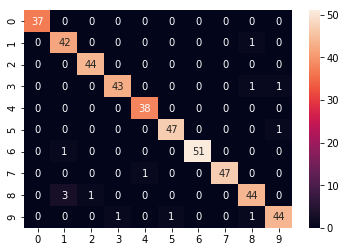

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = load_digits()
X,y = dataset.data,dataset.target
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
svm = SVC(kernel='linear').fit(X_train,y_train)
svm_predict = svm.predict(X_test)
cm = confusion_matrix(y_test,svm_predict)
data = pd.DataFrame(cm,index=[i for i in range(0,10)],columns=[i for i in range(0,10)])

plt.figure()
sns.heatmap(data,annot = True)

print(classification_report(y_test,svm_predict))
print("Macro Average", precision_score(y_test,svm_predict,average='macro'))
print("Micro Average", precision_score(y_test,svm_predict,average='micro'))

## Regression Evaluation

Evaluation metrics
R^2 score
    - 1 for perfect
    - 0 for constant prediction score
Mean_absolute_error - L1 norm laws
Mean_square_error - L2 norm laws
Median_absolute_error - Outliers
Dummy regressors - for getting the base line accuracy - R^2 = 0
    

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


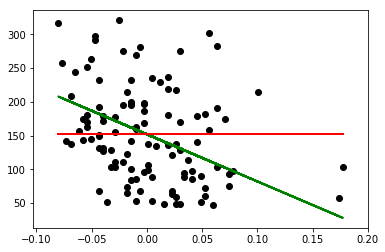

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

## Model Selection

In [ ]:
Based on Cross_val_score or GridSearchCV - accuracy(default)
- other evaluation can be specified in scoring parameter
- 

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_digits

dataset = load_digits()
X,y = dataset.data,dataset.target == 1
clf = SVC(kernel = 'linear',C=1)

print("Accuracy", cross_val_score(clf,X,y,cv=5))
print("ROC", cross_val_score(clf,X,y,cv=5,scoring = 'roc_auc'))
print("Recall", cross_val_score(clf,X,y,cv=5,scoring = 'recall'))


Accuracy [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
ROC [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Recall [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


In [74]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9962880475129918
Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.9998741278302142


Evaluation of Framework

Training set(model building)
Validation set(model selection)
Test set(final evaluation)


Learning Curve - impact of Training data on the accurate prediction of the Model   -Cost benefit analysis
Sensitive Analysis -  choice of parameters

## Naive Bayes Classifier

In [ ]:
- each feature is considered independent
- no correlation between the features

Naive Bayes
    - Bernoulli Navie Bayes Model - binary Feature - word present or not
    - Multinomial Navie Bayes Model - discreate Feature - word count
    - Gaussian  - Probability distribution

In [78]:
# Gaussian Navie Bayes Model
# - no parameters to control complexity

from sklearn.naive_bayes import GaussianNB

X_train,X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)
gbb = GaussianNB().fit(X_train, y_train)
print('Gaussian Score', gbb.score(X_test,y_test))

Gaussian Score 0.84


## Random Forest

Ensemble  - Combining different Models to gain efficiency so as to reduce overfitting
Random Forest
    - RandomForestClassifier
    - RandomForestRegressor
Multiple Decision Trees - More stable, Different trees

Different Trees are built using 
    - n_estimator - number of bootstrap copies - random selection of data - bootstrap sample - default 10
    - max_features - feature split - so as to allows only few features to be applied in decision tree - Very sensitive
        = 1 - more complex trees - to much diversion
        = number of features - similar trees 
    - random_state is important
    - max_depth - depth of the tree - None(split until pure node)
    - n_jobs - to select the number of cores in CPU
        = -1 all cores
        
Predicts each tree in the random forest
    - classificaiton - probability of each class 
    - Regression - mean of each tree prediction

No Need to normalize the data
No preprocessing
    
bootstrap sample 
- N samples in Training set => N records in bootstrap sample by repeatedly choosing values from the training set randomly
- will have repeated values

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_D2,y_D2,random_state=0)

clf = RandomForestClassifier(n_estimators = 10,random_state=0,max_features=2).fit(X_train,y_train)

print("Random Sample", clf.score(X_test,y_test))

Random Sample 0.76


## Gradient Boosted Decision Trees

In [ ]:
Gradient Boosted Trees
    - GradientBoostingClassifier
    - GradientBoostingRegressor

builds series of trees with each tree is build to correct the mistakes of the previous trees
small trees - weak learner
Not random trees

Parameters
    - n_estimators - controls Model Complexity - number of trees (default = 100)
    - learning_rate - emphasis on the correcting the previous trees - default = 0.1
        Higher values - more Complex tree
        Lower values - less complex tree
    - max_depth (default = 3) - Lesser value preferred
    - random_state important

No features scaling required


In [84]:
from sklearn.ensemble import GradientBoostingClassifier

X_train,X_test,y_train,y_test = train_test_split(X_D2,y_D2,random_state=0)
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.01,max_depth=2,random_state=0).fit(X_train,y_train)

print("Gradient Boosting", gbc.score(X_test,y_test))

Gradient Boosting 0.8


## Neural Network

Machine Learning -> Neural Network -> Deep Learning

Linear Regression -> y = b + w1x1 + w2x2.. + wnxn (w,b - least square/Lasso/Ridge) - linear function
Logistic Regression -> y = logistic(b + w1x1 + w2x2.. + wnxn)   - Non Linear function - Binary Classification
Multi Layer Preceptron:
    Input Features      =>       Hidden Layer       =>   Output
    X0,X1,....Xn ---------------> h0,h1....hn  -----------> y
                  w00,w01,..wnn                v0,v1,...vn

    hi -> Activation function- Non Linear
        -  = tanh(w11X0 +....wnnXn) - hyperbolic tangent function (ranges from -1 to 1)
        -  Rectified linear unit function (relu) - default (-ve inputs to Zero, max one)
    y = v0h0 + v1h1......+ vnhn
    
Parameters
    hidden_layer_sizes - list of Units in the hiddent layer 
            - model complexity(more layers more complex) 
            - Single hidden layer - logistic regression
            - (default - single hidden layer - 100 units)
            - [10,10] - two hidden layers with 10 units each
    solver - algorithm to find the weights 
        - lbfgs - smaller datasets
        - adam - larger datasets
    alpha = 0.0001 - regularization
        small - decision boundaries are complex - overfitting
        medium - decision boundaries are smooth - good fit
        high - simple model - underfit
    activation = tanh/relu/logistic - algorithm for the Neural network
    random_state

Normalization is important to do.

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_D2,y_D2,random_state=0)

nnclf = MLPClassifier(solver='lbfgs',activation='tanh',hidden_layer_sizes=[10],alpha=0.001,random_state=0).fit(X_train,y_train)

print('tanh Neural Network', nnclf.score(X_test,y_test))

nnclf = MLPClassifier(solver='lbfgs',activation='relu',hidden_layer_sizes=[10],alpha=0.001,random_state=0).fit(X_train,y_train)

print('relu Neural Network', nnclf.score(X_test,y_test))


tanh Neural Network 0.68
relu Neural Network 0.68


## Deep Learning

- Feature Extract - basic problem - Feature Engineer
- Feature learning/Feature Extraction - Deep Learning includes
Deep Learning architecture
    - Feature Extraction
        Convolution - filter for a pattern
        subsampling/pooling - translated/rotated version 
    - Classification

sklearn- doesn't support Deep Learning

Packages
Keras
Lasagne

Tensor Flow
Theano

## Data Leakage

- Major problem in machine learing
- Making the original Target Values for the furture dataset making it available in the training phase
    - making the label as a feature of the model
    - Gives optimal results for the test data but fails very badly when it is deployed and used for real world data.

Problem areas
    - Leakage in Training data 
        - Normalizing/minmax(to remove outliners) on the whole dataset
        - Preprocessing of data before training
        - Timeseries data
    - Leakage in features
        - feature having info on the output - Proxy variables
Solutions
    - Explore the data before building models - high feature weights for predicting
    - more optimal values by the model
    - limited deploy in slow role
    - data preparation in each fold of cross-validation in train and test
    - split of test set before working 
        

## Unsupervised Learning

- No target Values/labels
- capture structures
    - Clustering
        - Density
    - Outliners

Methods    
- Transformations - Extracts data
    - Density Estimation -/8 Provides features for Classifier/Regressor - Probability estimater
    - Dimensionality Reduction - PCA 
    - Manifold
        - MDS - Multi Dimensional Scaling
        - t-SNE
- Clustering

## PCA - Principle Component Analysis

- Dimensionality Reduction
- Maximum Variance
- Considers all the features provided and creates new features based on the n_component
- the n dimension will represent all the features in the new PCA space
- no need to split the data into train and test

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_cancer,y_cancer = cancer.data,cancer.target

X_norm = StandardScaler().fit_transform(X_cancer)

pca = PCA(n_components = 2).fit(X_norm)

print(pca.transform(X_norm).shape)
print(X_cancer.shape)

(569, 2)
(569, 30)


In [13]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

## Manifolder

In [ ]:
- low dimensional structure in high dimensional space
    - Multidimensional Scaling
    - t-SNE

In [19]:
# Multidimensional scaling 

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
import numpy as np
import pandas as pd

fruitdatapath = r'C:\Users\Upend\Anaconda3\MyScripts\Fruit_Data.txt'

fruit_data = pd.read_table(fruitdatapath)
X_fruits = fruit_data[['height','width','mass','color_score']]
y_fruits = fruit_data['fruit_label']

X_stand = StandardScaler().fit_transform(X_fruits)

mds = MDS(n_components = 2)

mds.fit_transform(X_stand).shape

C:\Users\Upend\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Upend\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(59, 2)

In [23]:
# t-SNE 
#- preserves the distance between two points in original data while transforming into a higher dimension
#- works well in clearly defined patterns of neighbours


from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne.fit_transform(X_stand).shape


(59, 2)

## Clusters

- To create clusters without labels or training the data 
- New points will be mapped to clusters
- Methods
    - K-mean Clustering
    - Agglomerative Clustering
    - DBSCAN - Density Based Spatial Clustering of Application with Noise

# K-mean Clustering
- Step 1: find choose n locations in the space randomly as cluster centers
- Steps 2: Calculate mean location of all the points in the cluster and use it as the new cluster center
    repeat the above steps
- always Normalize
- supports predict method

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state=0)
kmeans.fit_transform(X_stand).shape

(59, 4)

# Agglomerative Clustering
- considers each point as a cluster, then sequence of clusterings are done where two similar clusters are merged
- this continues until it meets the stopping condition of number of clusters
- iterative bottom up approach
- Linkage criteria - how to choose two clusters to merge as one
    - Ward's method - least in the total variance - preferred
    - Average linkage - smallest average distance between clusters
    - Complete Linkage - smallest max distance between clusters
- fit_ predit method 
- Dendrogram - graphical representation of Hierarchical Clustering


In [31]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X,y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assig = cls.fit_predict(X)

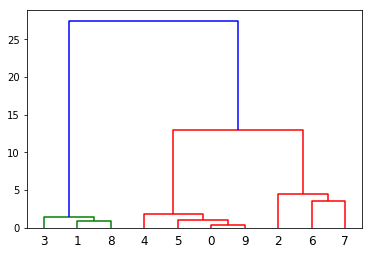

In [34]:
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt
%matplotlib inline

X,y = make_blobs(random_state = 10, n_samples = 10)

plt.figure()
dendrogram(ward(X));

# DBSCAN Clustering
- no need to specify the number of clusters
- finds outliers
- suitable for more noisy data
- clusters in space are dense and with area between two clusters in not dense
- core points - dense points 
- eps units - which specify the distance units from the core points are clustered
            - all other points are outliers
- points which are eps units but not in core points are all boundary points
Parameters
    - min_samples
    - eps

-1 is noise

In [39]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 2, min_samples = 2)
cls = dbscan.fit_predict(X)
cls

array([ 0,  1, -1,  1,  0,  0, -1, -1,  1,  0], dtype=int64)

## Cluster Evaluation

In [ ]:
- Very Hard as there is not ground truth
- Needs human experise to evaluate